
# RADAR

<p dir="rtl" style="text-align: right;">
רדר הוא חיישן פעיל ויש כמה סוגים חלקם פתוחים לציבור וישנם ערוצים שונים. . הרדר שלוח אות באורך גל מסוים ומקבל את ההחזר היחסי. 

<p dir="rtl" style="text-align: right;">
כמה סוגים של חיישני רדר והם באיזור המיקרו גל (ס"מ). היתרון והחיסרון שלו הוא שהגלים שלו יכולים לחדור את העץ. חלק מהרוצים חודרים את החופה וחלר ממש לענפים. ככל שאורך הגל גדול כך הוא יכול יותר לחדור למשטח (לפעמים גם את האדמה). X לא חודר את הצמחייה. C חודר קצת לחופה וL חודר ממש מתחת לחופה. זה רלוונטי לארכיאולוגיה או לחקירת דברים מתחת לאדמה. L יכול לגלות ערוצי זרימה שהיום לא רואים אותם.

<p dir="rtl" style="text-align: right;">
ברדאר מודדים את יחס ההחזריות . זה תלוי בצורת הפגיעה, זוית המשטח, חספוס המשטח , זוית החיישן וכד'. בשטח שטוח כמעט ולא חוזרת הקרן. ביער הקרנות מתפזרות בפנים וחוזרות למקום אחר. בעיר זה מתנהג אחרת וכד'. יותר קשה לנתח תמונות לווין. בנוסף הגלים יכולים לצאת בצורה אנכית ואופקית. הוא יכול לשדר ולקבל בכל אחת מהאפשרויות. 

<p dir="rtl" style="text-align: right;">
זוית אחת של החזרה תחזור יותר ביער ואחרת בעיר וכד' ככה יודעים איך לתרגמים את האות למשטח מסוים. 

<p dir="rtl" style="text-align: right;">
שימושים שונים: דליפות נפט בים בהתעלמות מעננים. מכם חודר עננים. ,גילוי ספינות וגלים. גילוי שיטפון, בנוסף ניתן למדוד החזריות מערוץ P ולדעת ביומסה ביער.

<p dir="rtl" style="text-align: right;">
אפשר לקבל סוג של מדדי צומח שקשורים למשתנים של ביומסה . בנוסף אפשר לקבל את לחות הקרקע או ע"י למידת מכונה שלא קשור לפיזיקלי או ע"י מודלים פיזיקליים שלוקחים בחשבון את זוית החיישן, צמחיה, וכד'.ויש מודלים מסובכים יותר שמתחשבים בסוג הקרקע וכד,. 

<p dir="rtl" style="text-align: right;"> 
ישש הרבה הפרעות שיוצרות רעש. למשל טופוגרפיה או רעש שקים בחיישן עצמו שאפשר לקבל תוצר שמנקה את זה אוטומטית. 

In [6]:
!pip install cftime
!pip install --no-binary shapely shapely --force
!pip install cartopy
!pip install rioxarray
!pip install geopandas
!pip install pycrs

     |████████████████████████████████| 389kB 9.1MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.7.1
    Uninstalling Shapely-1.7.1:
      Successfully uninstalled Shapely-1.7.1
    Running setup.py install for shapely ... done
     |████████████████████████████████| 12.1MB 232kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 225kB 40.4MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516170 sha256=a44f6f59b9a1a2fe86f1c0701307d19736aa28e0c7166789d914e788cb1645f9
  Stored in directory: /root/.cache/pip/wheels/45/7f/3b/37879587817fd1bbbee7b47312e2401b4f542cccf2fbe9b4ee
Successfully built cartopy
  Created wheel for pyshp: filename=

In [7]:
import os
import warnings
import cartopy
import rioxarray
import matplotlib.pyplot as plt
import numpy.ma as ma
import xarray as xr
import rioxarray as rio
from shapely.geometry import mapping, box
import rasterio
from rasterio.plot import show
warnings.simplefilter('ignore')
import math
import numpy as np 
import sklearn.metrics as metrics
from osgeo import gdal, gdalconst
from gdalconst import GA_ReadOnly
from matplotlib import ticker
import cartopy.crs as ccrs
import geopandas as gpd

In [3]:
# Import GEE for python and get into your account
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=S_9JKFNIwDcI2OdQgctg6JAUTbsnAey9LYKtxh-NOcc&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g5lliiBmx6wdvREzsTrDFlL1zapJ7qwwRe1BCGLRgz3QXB2b-9rwCs

Successfully saved authorization token.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Text(0.5, 0, '$\\overline{\\gamma^o}$ [dB]')

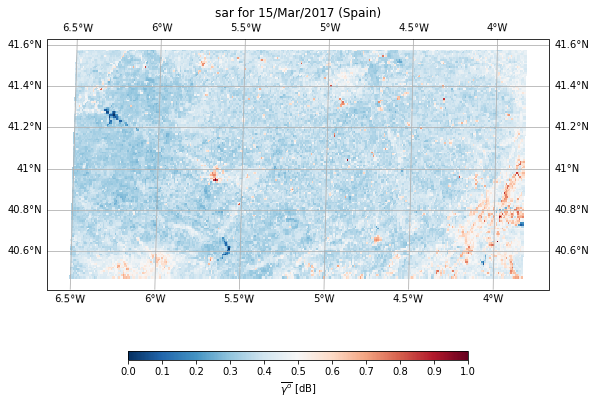

In [15]:
  
#3 plot the SAR data
# Let's plot the SAR data image nicely...
import geopandas as gpd

SAR_C = xr.open_rasterio('/content/drive/MyDrive/gdrive_folder/SAR.tif')
array_input = SAR_C
array_input = array_input * 1
max_sar = array_input.max()
min_sar = array_input.min()
SMI = (array_input-min_sar)/(max_sar-min_sar)

plt.figure(figsize=(9,6))
ax1 = plt.axes(projection=ccrs.Robinson())
ax1.coastlines()
ax1.add_feature(cartopy.feature.OCEAN)
ax1.gridlines(draw_labels=True)

p1 = SMI.plot(ax=ax1,
             vmin=-0, vmax=1,
             cmap='RdBu_r',
             transform=ccrs.PlateCarree(),
             add_colorbar=False)

plt.title('sar for 15/Mar/2017 (Spain)')
ax_cb = plt.axes([0.25, 0.05, 0.525, 0.02])
tick_locator = ticker.MaxNLocator(nbins=10)
cb = plt.colorbar(p1, cax=ax_cb, orientation='horizontal')
cb.locator = tick_locator
cb.update_ticks()
cb.ax.set_xlabel(r'$\overline{\gamma^o}$ [dB]')

<xarray.DataArray (band: 1, y: 123, x: 298)>
array([[[0.44573142, 0.41747804, 0.4277177 , ..., 0.4913013 ,
         0.45787415, 0.45325775],
        [0.48463476, 0.37461913, 0.35954211, ..., 0.45061795,
         0.43425735, 0.46811061],
        [0.46609542, 0.42687963, 0.37078445, ..., 0.41953575,
         0.44505124, 0.46217282],
        ...,
        [0.50600521, 0.40379584, 0.35130782, ..., 0.4123874 ,
         0.4250193 , 0.43549106],
        [0.34838628, 0.36375845, 0.35230086, ..., 0.60392289,
         0.43732036, 0.47678402],
        [0.3635254 , 0.36093256, 0.35030899, ..., 0.71465968,
         0.54455931, 0.65273567]]])
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 41.57 41.56 41.55 41.54 ... 40.5 40.49 40.48 40.47
  * x        (x) float64 -6.499 -6.49 -6.481 -6.472 ... -3.849 -3.84 -3.831